In [47]:
import ils.cfsdp as cfs
import ils.utils as ut
import ils.basic_ils as ils
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold import TSNE
import time
import warnings
warnings.filterwarnings("ignore")

### Loading data

In [2]:
X = ut.synthetic_data()
X[0]

,x,y
ID,,
0,-0.873066,0.063665
1,0.389043,-0.716850
2,-1.521011,-0.627260
3,-1.702065,-0.461650
4,-1.564018,-1.128734
...,...,...
1495,-0.889829,-0.056356
1496,0.009593,-0.728226
1497,0.522810,0.676874


In [3]:
original_df = pd.read_csv("dataset/Ag_features_normalised.csv")
ag_data = original_df.copy()
ag_data = ag_data[['popFCC', 'popHCP', 'popICOS', 'SCN3', 'SCN4', 'SCN5', 'SCN6', 'SCN7', 'SCN8', 'SCN9', 'SCN10', 'popSurface', 'coordNumberNormalised']]

### Defining distance calculation and Using Clustering

In [4]:
def pre_calculate(data):
    start = time.time()
    distance_matrix = pairwise_distances(data)
    dc, dc_value_list, field = cfs.choose_dc(distance_matrix)
    print(dc)
    density = cfs.continuous_density(distance_matrix, dc)
    delta_matrix = cfs.delta_function(distance_matrix, density) 
    scores = cfs.choosing_centernumber(density, delta_matrix)
    end = time.time()
    print('Density caluation time {}'.format(end-start))
    return scores, density, delta_matrix

In [5]:
def combine_clustering(data, scores, k):
    index = cfs.top_k_idx(scores, k)
    newL, count = cfs.applyILS(data, index)
    return newL, count, index

In [6]:
def test_cfsdp(data, k, X_embedded):
    scores, density, delta_matrix = pre_calculate(data)
    cfs.plot_center(delta_matrix, density, scores)
    cfs.density_delta(density, delta_matrix, X_embedded)
    newL, count, index = combine_clustering(data, scores, k)
    cfs.draw_ILS(count, X_embedded, newL, ut.colors)
    cfs.plot_centroid(X_embedded, index)

In [7]:
scores, density, delta_matrix = pre_calculate(X[0])

0.14999234752441917
Density caluation time 3.294394016265869


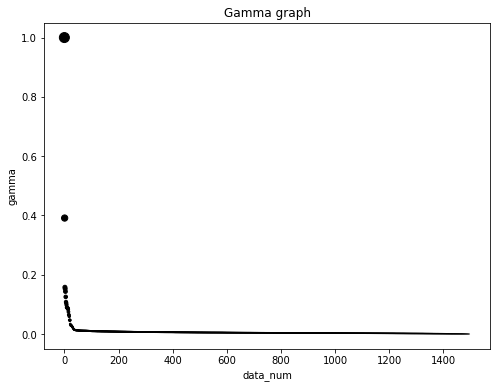

In [8]:
cfs.plot_center(delta_matrix, density, scores)


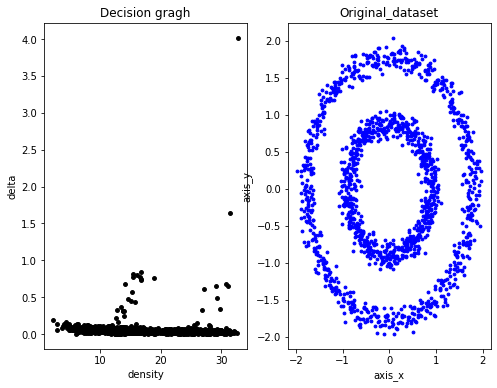

In [9]:
cfs.density_delta(density, delta_matrix, X[0])

In [10]:
newL, count, index = combine_clustering(X[0], scores, 2)

The number of clusters: 2
Iterative label spreading took 8.5s


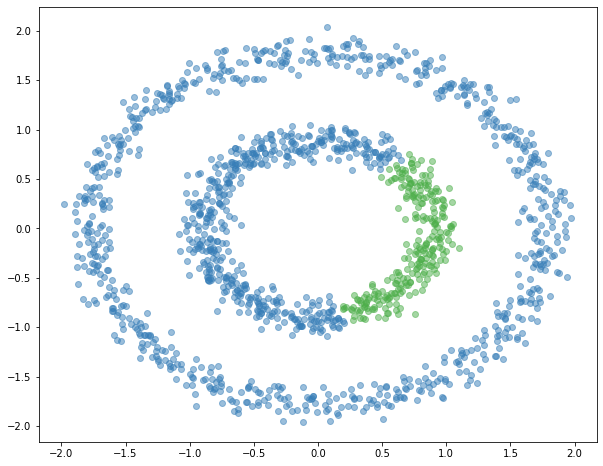

In [11]:
cfs.draw_ILS(count, X[0], newL, ut.colors)

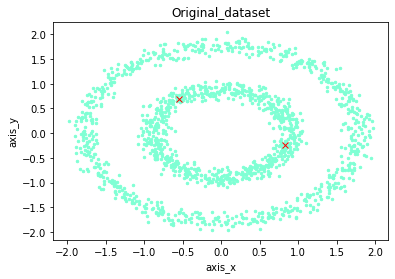

In [12]:
cfs.plot_centroid(X[0], index)

### Failure case using peak finding index

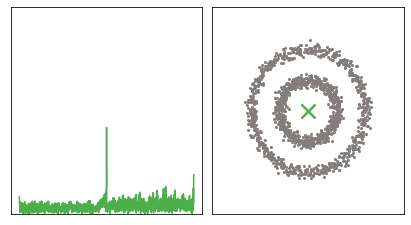

In [48]:
df = X[0]
features = ['x','y']
df['label'] = 0 
centroid = df[features].mean()
closestToCentroid =  ut.min_toCentroid(df[features], centroid = centroid , features = features ) 
df.loc[closestToCentroid,'label'] = 1
newL, orderedL = ils.ILS(df[features + ['label']],'label') 
ut.plot_ILSdistances(df, orderedL['minR'].values, centroid, 2)

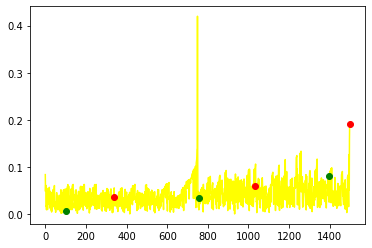

In [53]:
minima, maxima = ut.findMin(orderedL['minR'].values, 100)

The number of clusters: 2
Iterative label spreading took 8.5s


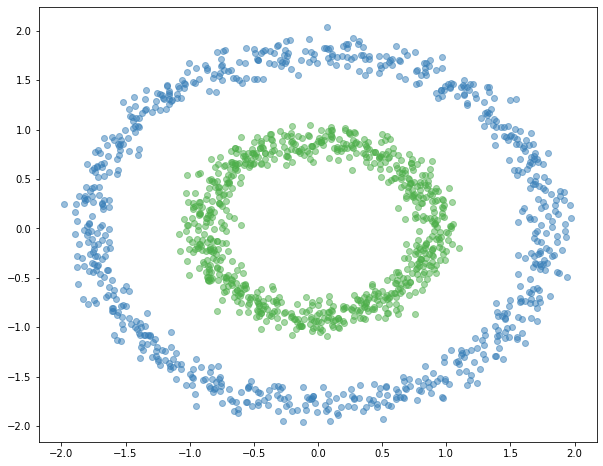

In [55]:
index = [minima[0], minima[2]]
newL, count = cfs.applyILS(X[0], index)
cfs.draw_ILS(count, X[0], newL, ut.colors)

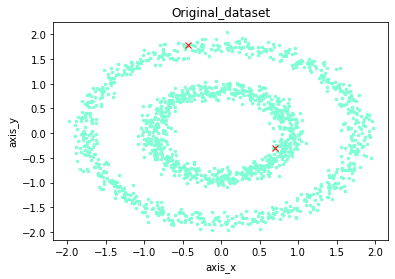

In [56]:
cfs.plot_centroid(X[0], index)

0.08570991287109667
Density caluation time 3.4653220176696777


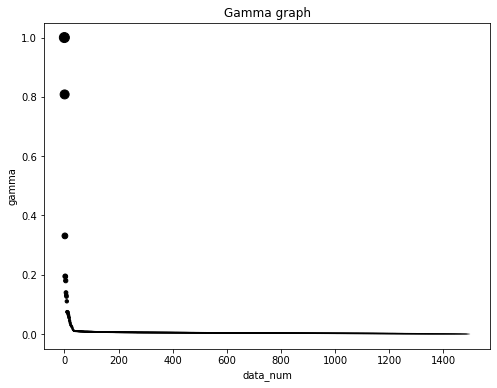

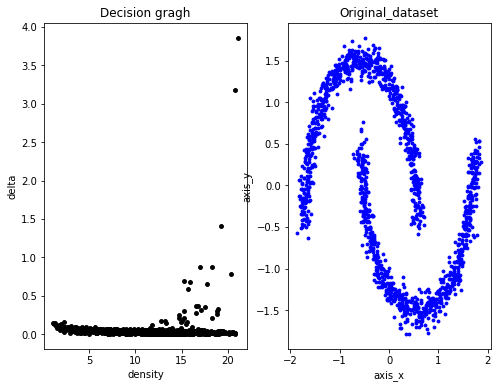

The number of clusters: 2
Iterative label spreading took 8.8s


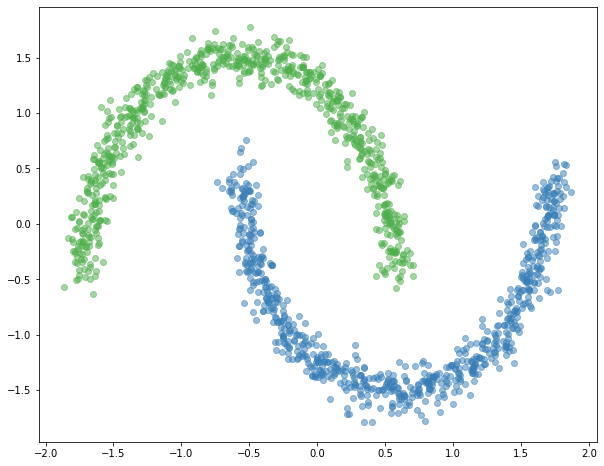

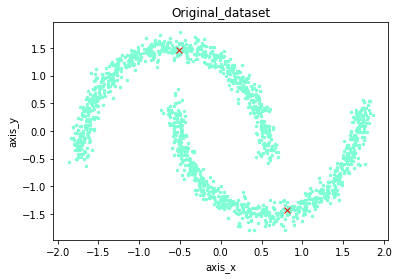

In [15]:
test_cfsdp(X[1],2, X[1])

0.17141982574219333
Density caluation time 3.4280591011047363


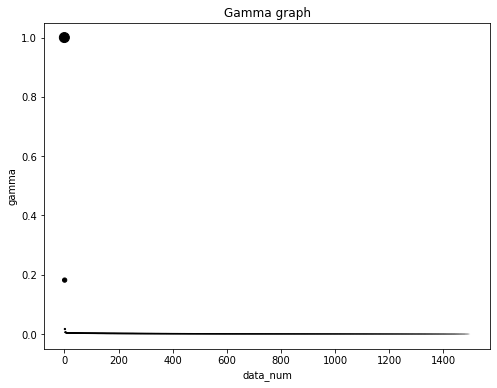

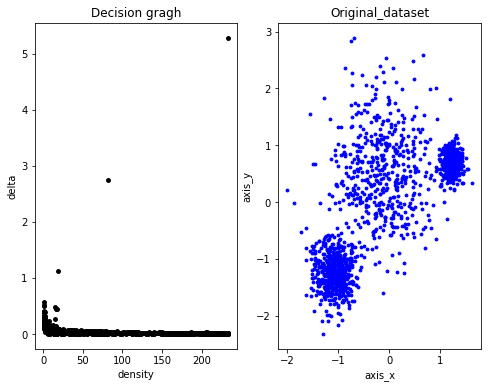

The number of clusters: 3
Iterative label spreading took 8.3s


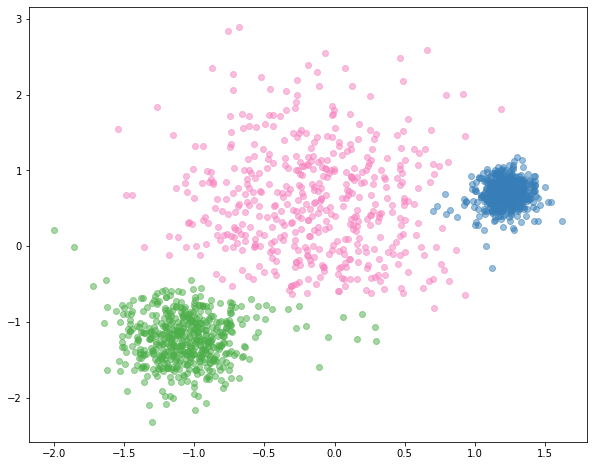

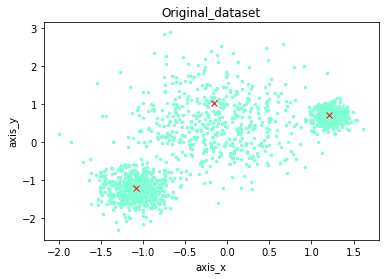

In [16]:
test_cfsdp(X[2],3, X[2])

0.14999234752441917
Density caluation time 3.3691060543060303


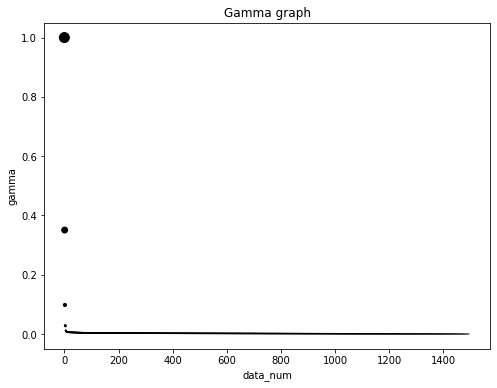

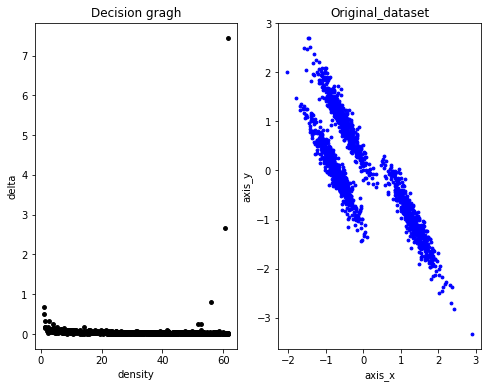

The number of clusters: 3
Iterative label spreading took 8.6s


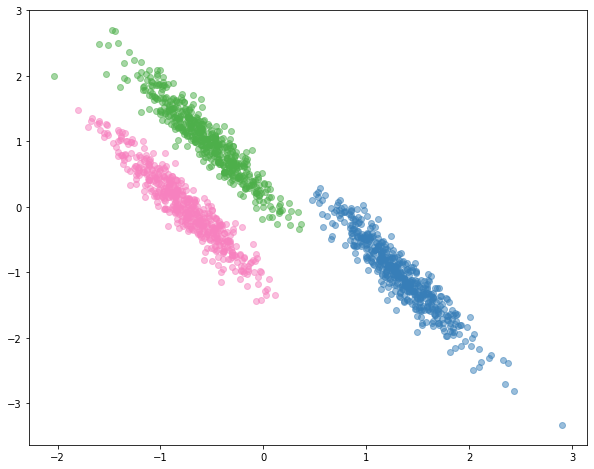

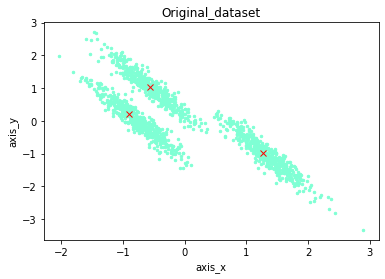

In [17]:
test_cfsdp(X[3],3, X[3])

0.12856486930664499
Density caluation time 3.5046627521514893


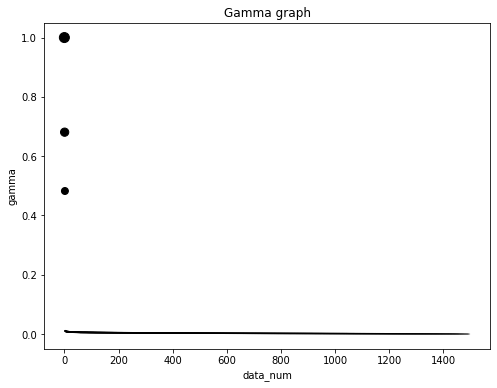

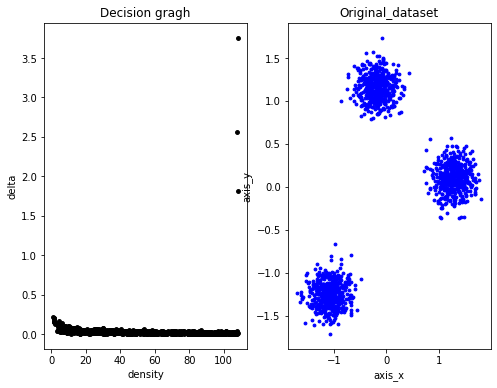

The number of clusters: 3
Iterative label spreading took 8.6s


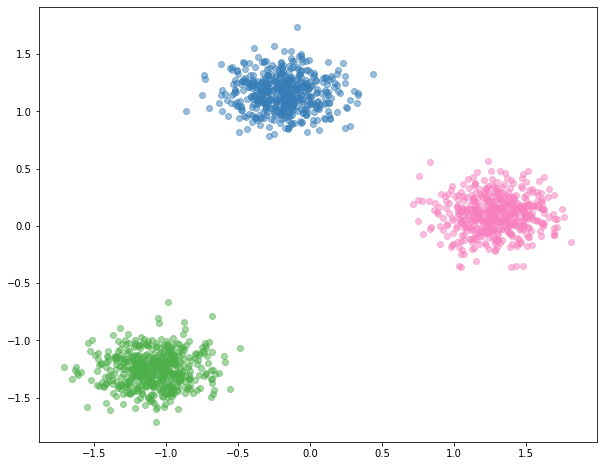

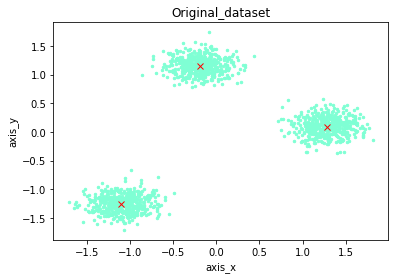

In [18]:
test_cfsdp(X[4],3, X[4])

0.10713739108887084
Density caluation time 3.4204299449920654


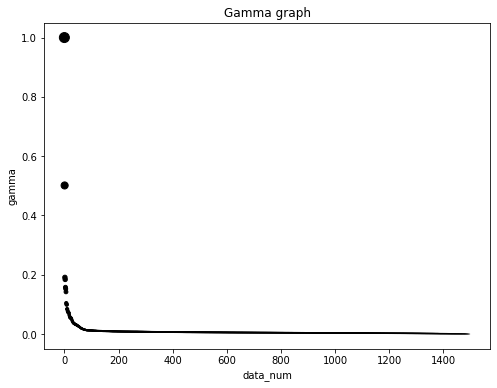

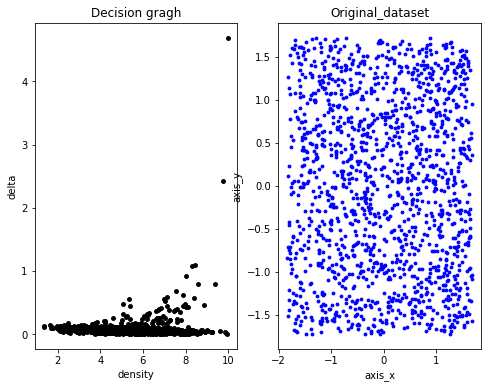

The number of clusters: 3
Iterative label spreading took 9.0s


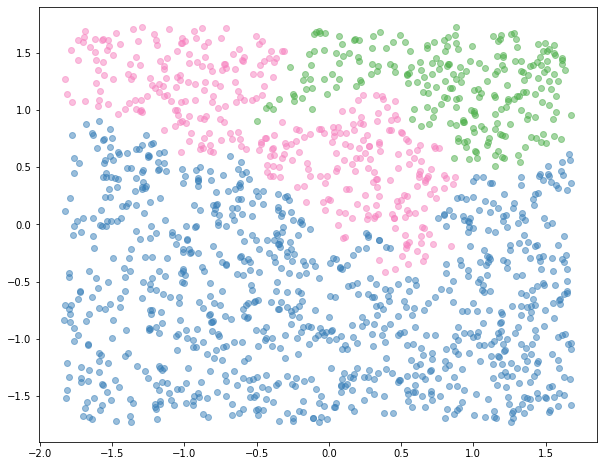

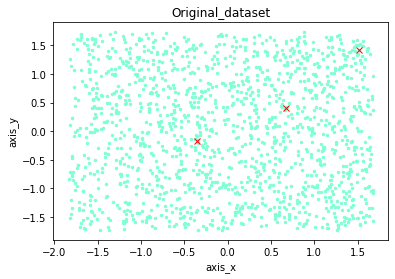

In [19]:
test_cfsdp(X[5],3, X[5])

In [20]:
X_embedded = ag_data.copy()
X_embedded = TSNE(n_components=2, perplexity=30, random_state=42, verbose=1).fit_transform(X_embedded)
X_embedded = pd.DataFrame(X_embedded, columns = ['x', 'y'])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 425 samples in 0.001s...
[t-SNE] Computed neighbors for 425 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 425 / 425
[t-SNE] Mean sigma: 0.112412
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.100662
[t-SNE] KL divergence after 1000 iterations: 0.403229


0.21427478217774168
Density caluation time 0.6701643466949463


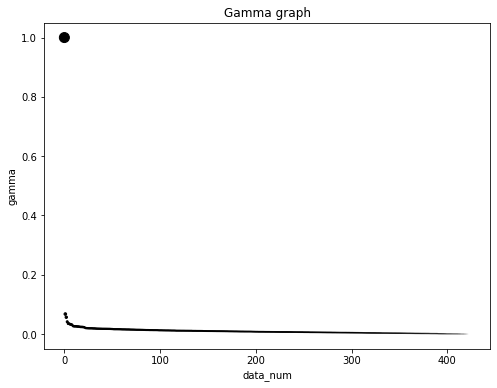

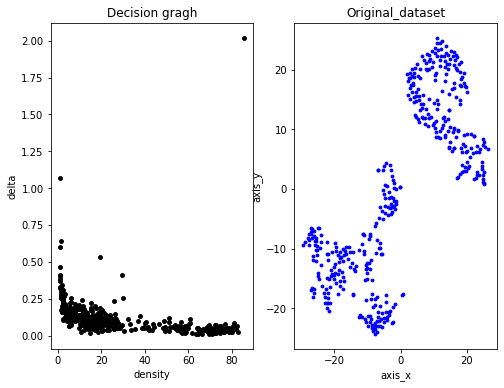

The number of clusters: 3
Iterative label spreading took 1.4s


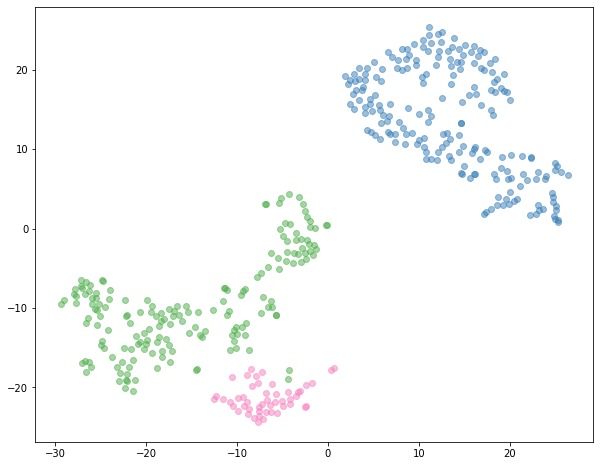

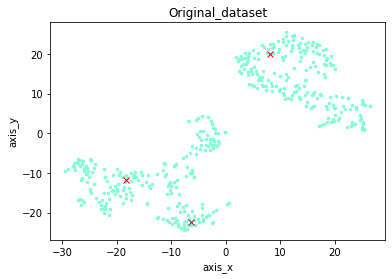

In [21]:
test_cfsdp(ag_data, 3, X_embedded)

0.21427478217774168
Density caluation time 0.6208868026733398
The number of clusters: 3
Iterative label spreading took 1.4s


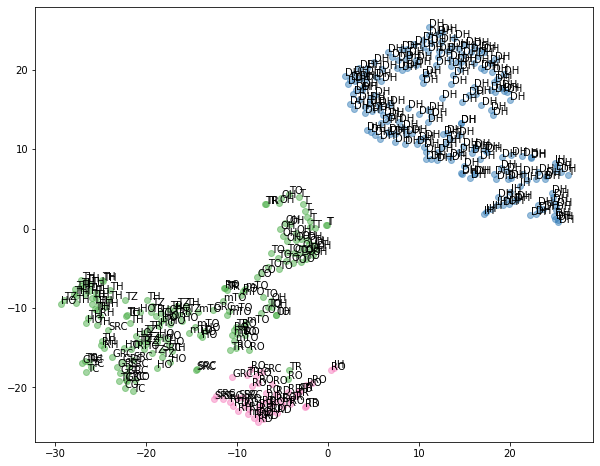

In [22]:
scores, density, delta_matrix = pre_calculate(ag_data)
newL, count, index = combine_clustering(ag_data, scores, 3)
cfs.draw_ILS_with_shape(count, X_embedded, newL, ut.colors, original_df)